In [57]:
import numpy as np
import pandas as pd
data=pd.read_csv('car_price_prediction.csv')
data.head()
data.info()
print(data.isnull().sum())
print(data.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [58]:
#data cleaning
data=data.drop_duplicates()
print(data.duplicated().sum())
data['Mileage']=data['Mileage'].str.replace('km','').str.replace(',','').astype(float)
data['Levy']=data['Levy'].replace('-',0).astype(float)
data['Engine volume']=data['Engine volume'].str.replace(r'[^\d.]', '', regex=True).astype(float)
data['Doors']=data['Doors'].replace(r'[^\d.]','',regex=True).astype(int)
print(data.head())

#feature engineering
import datetime


data['Age']=datetime.datetime.now().year-data['Prod. year']
data.drop('Prod. year',axis=1,inplace=True)
data=data.drop('ID',axis=1)
data['Leather interior']=data['Leather interior'].map({'Yes':1,'No':0}).astype(int)



0
         ID  Price    Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399.0        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018.0    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     0.0        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862.0         FORD   Escape        2011       Jeep   
4  45809263  11726   446.0        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type  Engine volume   Mileage  Cylinders  \
0              Yes    Hybrid            3.5  186005.0        6.0   
1               No    Petrol            3.0  192000.0        6.0   
2               No    Petrol            1.3  200000.0        4.0   
3              Yes    Hybrid            2.5  168966.0        4.0   
4              Yes    Petrol            1.3   91901.0        4.0   

  Gear box type Drive wheels  Doors             Wheel   Color  Airbags  
0     Automatic          4x4      4        Left wheel  Silver    

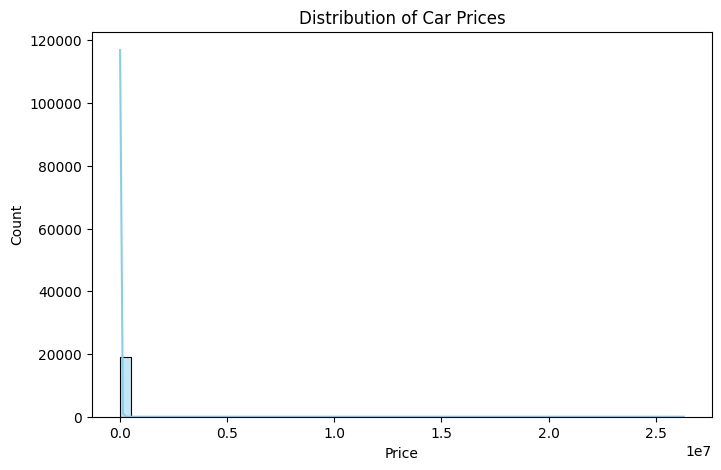

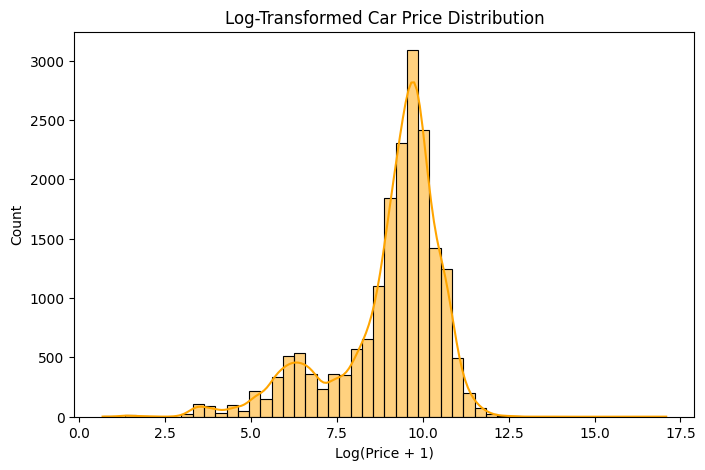

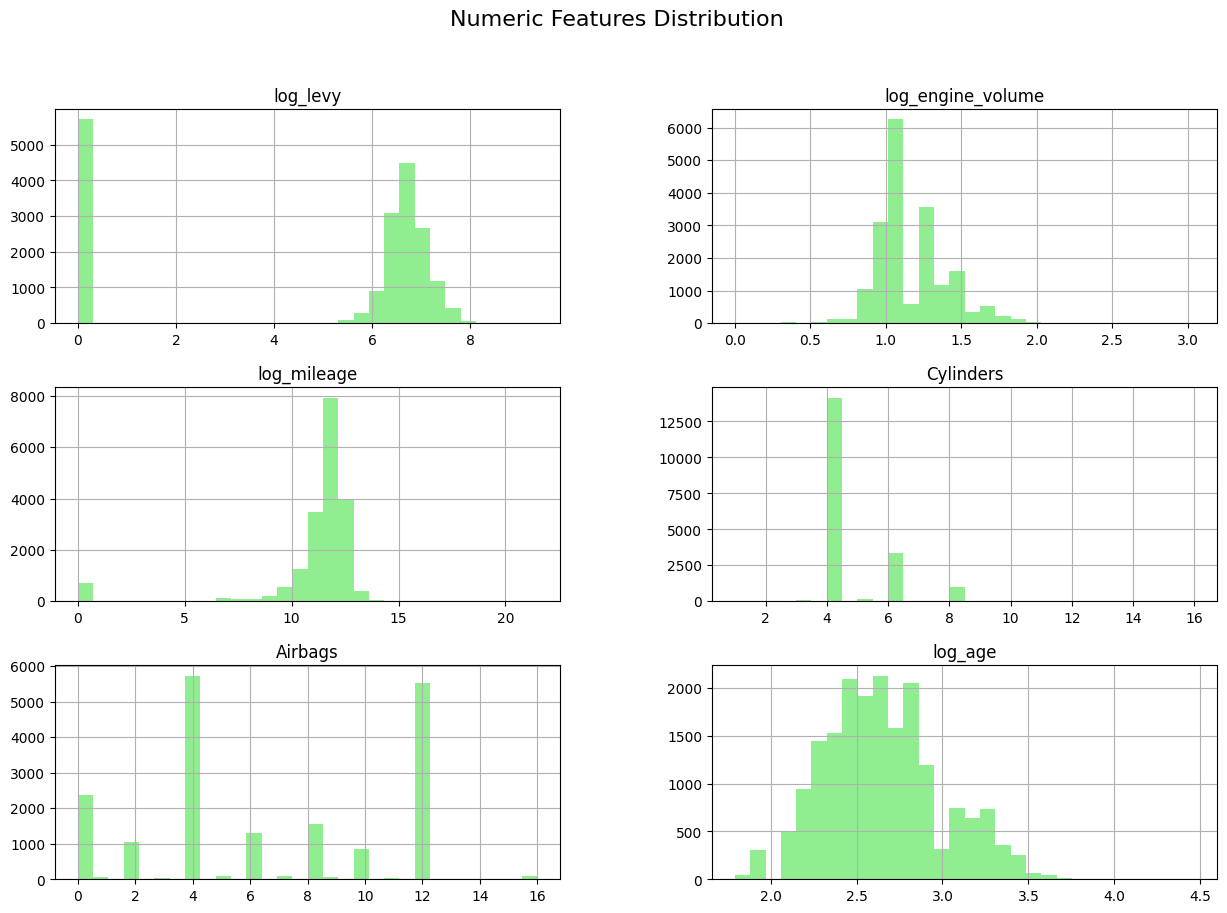

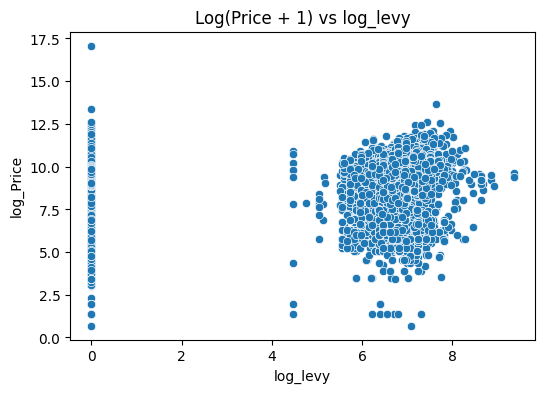

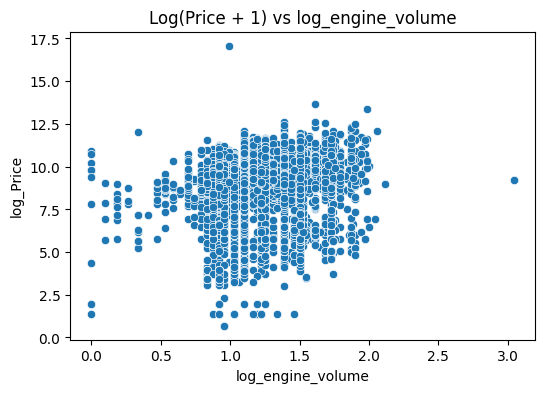

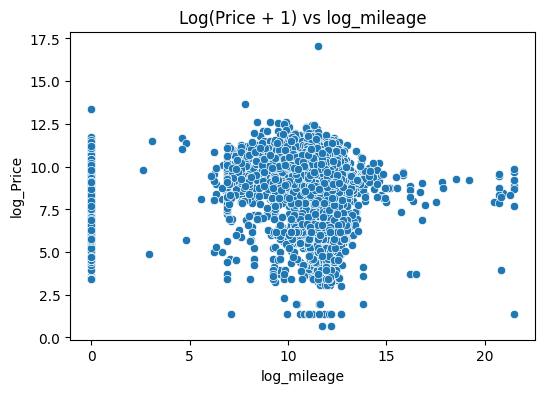

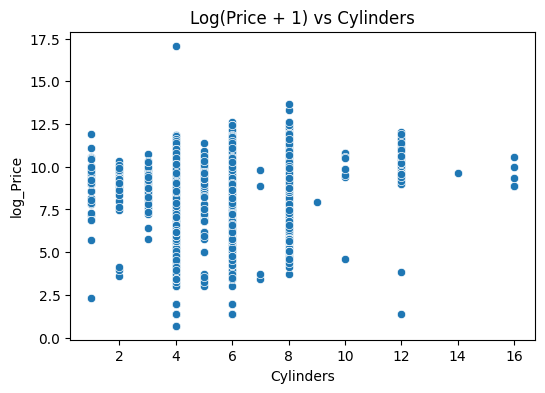

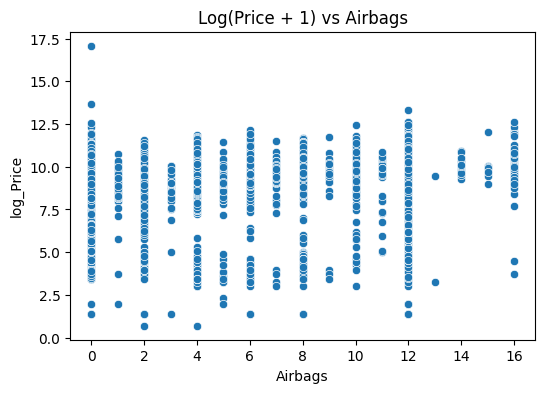

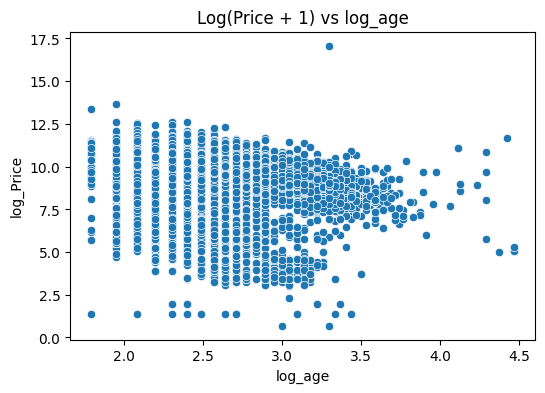

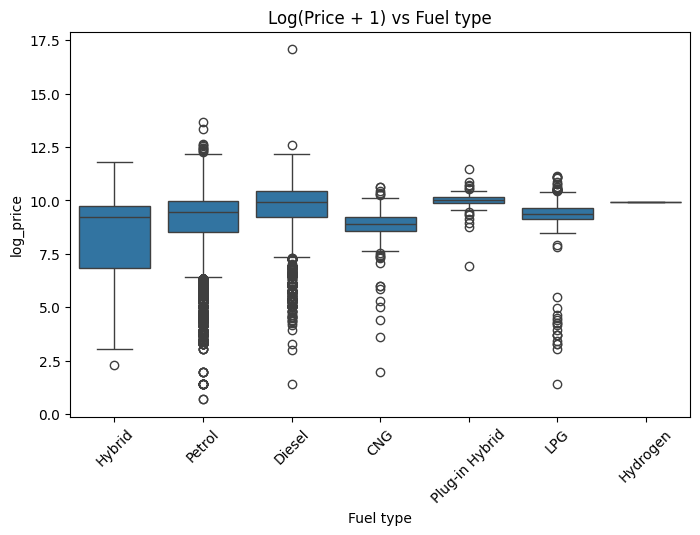

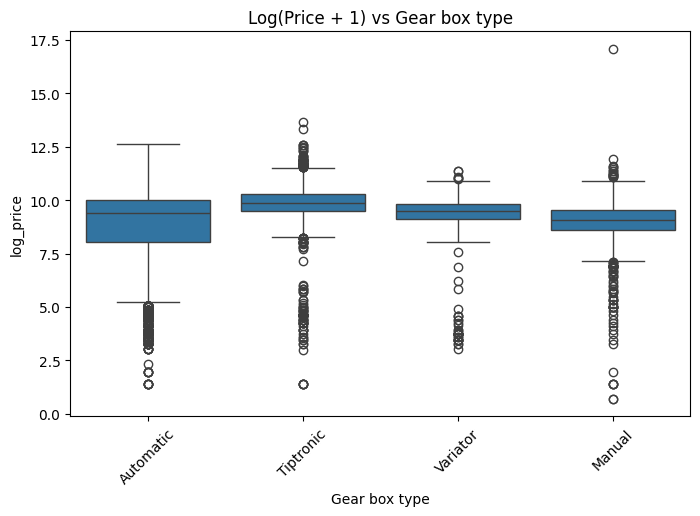

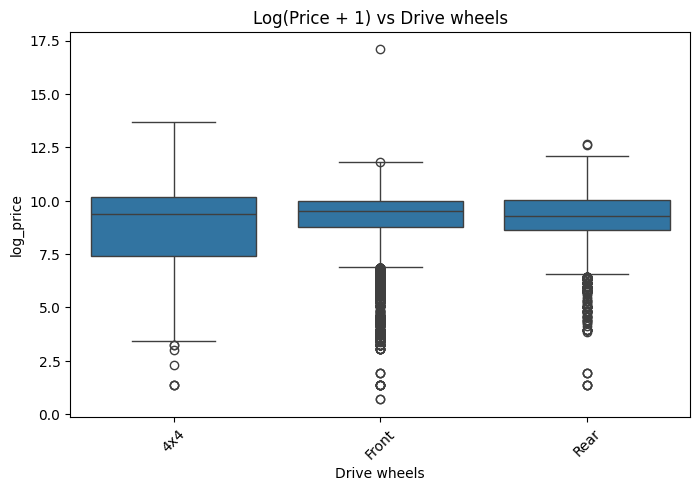

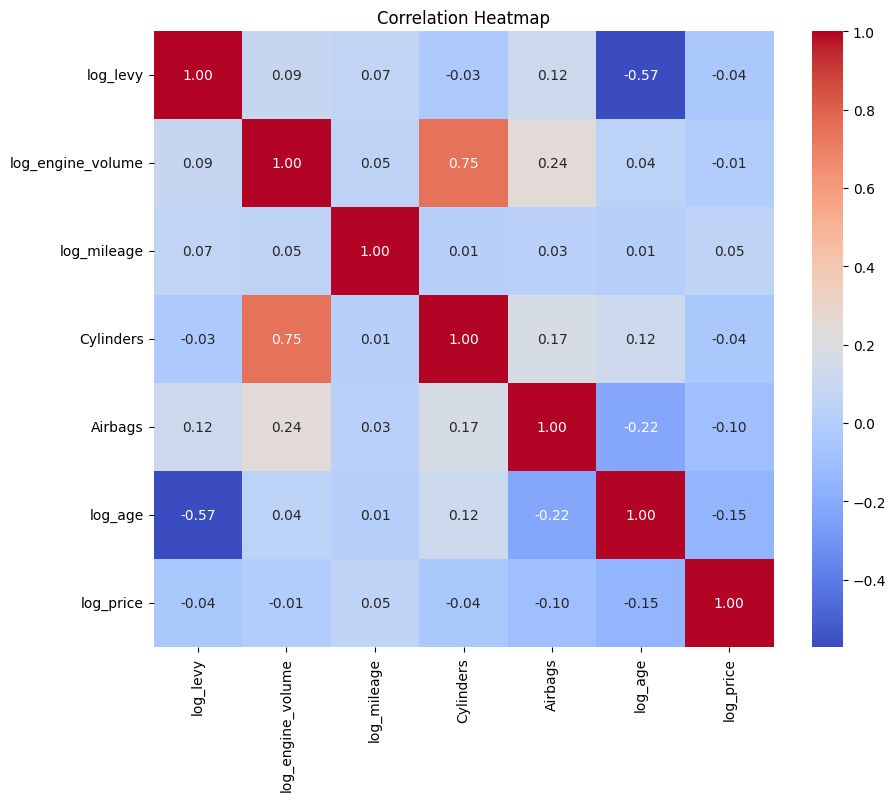

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1️⃣ Distribution of Target: Price
# -------------------------------
plt.figure(figsize=(8,5))
sns.histplot(data['Price'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Optional: log-transform visualization
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(data['Price']), bins=50, kde=True, color='orange')
data['log_price'] = np.log1p(data['Price'])
plt.title("Log-Transformed Car Price Distribution")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 2️⃣ Distribution of Numeric Features
# -------------------------------
data['log_mileage'] = np.log1p(data['Mileage'])
data['log_levy'] = np.log1p(data['Levy'])
data['log_engine_volume'] = np.log1p(data['Engine volume'])
data['log_age']=np.log1p(data['Age'])   

numeric_cols = ['log_levy', 'log_engine_volume', 'log_mileage', 'Cylinders', 'Airbags', 'log_age']
data[numeric_cols].hist(figsize=(15,10), bins=30, color='lightgreen')
plt.suptitle("Numeric Features Distribution", fontsize=16)
plt.show()

# -------------------------------
# 3️⃣ Scatter Plots vs Target
# -------------------------------
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data[col], y=data['log_price'])
    plt.title(f"Log(Price + 1) vs {col}")
    plt.xlabel(col)
    plt.ylabel("log_Price")
    plt.show()

# -------------------------------
# 4️⃣ Boxplots for Categorical Features
# -------------------------------
categorical_cols = ['Fuel type', 'Gear box type', 'Drive wheels']
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=col, y='log_price', data=data)
    plt.title(f"Log(Price + 1) vs {col}")
    plt.xticks(rotation=45)
    plt.show()

# -------------------------------
# 5️⃣ Correlation Heatmap
# -------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(data[numeric_cols + ['log_price']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [60]:
import pandas as pd

categorical_cols = ['Manufacturer', 'Category', 'Fuel type', 'Gear box type', 
                    'Drive wheels', 'Wheel', 'Color']

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [61]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Columns: 116 entries, Price to Color_Yellow
dtypes: bool(101), float64(9), int64(5), object(1)
memory usage: 4.1+ MB
None


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
import numpy as np


X = data.drop(['log_price', 'Model','Price'], axis=1)
y = data['log_price']


scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')

print("R² scores for each fold:", scores)
print("Mean R²:", np.mean(scores))


R² scores for each fold: [0.23082388 0.2354203  0.250562   0.2489994  0.2157595 ]
Mean R²: 0.23631301574314997


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV,RidgeCV
import numpy as np
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Levy', 'Leather interior', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


X = data.drop(['log_price', 'Model','Price','Mileage', 'Age', 'Levy'], axis=1)
y = data['log_price']
lasso = LassoCV(cv=5, random_state=42, alphas=[0.001,0.1, 1.0, 10.0])
ridge = RidgeCV(cv=5, alphas=[0.1, 1.0, 10.0])  
scores1 = cross_val_score(lasso, X, y, cv=5, scoring='r2')
scores2 = cross_val_score(ridge, X, y, cv=5, scoring='r2')
print("R² scores for each fold (Lasso):", scores1)
print("Mean R² (Lasso):", np.mean(scores1))
print("R² scores for each fold (Ridge):", scores2)
print("Mean R² (Ridge):", np.mean(scores2))


R² scores for each fold (Lasso): [0.23228265 0.23547532 0.24851794 0.24642154 0.2190534 ]
Mean R² (Lasso): 0.23635016987847274
R² scores for each fold (Ridge): [0.23260537 0.23726156 0.25059521 0.24850699 0.21915887]
Mean R² (Ridge): 0.23762559865449856


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np


rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)

scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')


print("R² scores for each fold (Random Forest):", scores)
print("Mean R² (Random Forest):", np.mean(scores))

R² scores for each fold (Random Forest): [0.66155411 0.60506069 0.62320527 0.62649838 0.62737804]
Mean R² (Random Forest): 0.6287392987494272


In [65]:
# First, train the model on the full dataset
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_model.fit(X, y)

# Get and display feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort and print the top 10 most important features
print(feature_importance_df.sort_values(by='importance', ascending=False).head(10))

                    feature  importance
5               log_mileage    0.169466
4                   Airbags    0.155540
8                   log_age    0.123734
90  Gear box type_Tiptronic    0.097868
6                  log_levy    0.088373
0          Leather interior    0.032464
1             Engine volume    0.029407
7         log_engine_volume    0.029159
84         Fuel type_Hybrid    0.021354
76            Category_Jeep    0.016850
